<a href="https://colab.research.google.com/github/rahulputhukkot/Machine-Learning-Python/blob/develop/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
Refernce 
  - https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
  - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html (Caveats)
  - https://www.datacamp.com/community/tutorials/k-means-clustering-python (Additional sample)
  - https://www.naftaliharris.com/blog/visualizing-k-means-clustering/ (Animation)
'''

from matplotlib import pyplot as plt
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

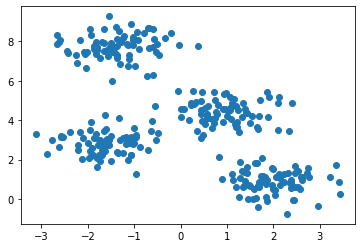

In [2]:
'''
Generating data for clustering
  n_samples     - Number of data points
  centers       - Number of clusters
  cluster_std   - Standard devidation of each cluster
  random_state  - A number assigned so as to generate the same data everytime when this code runs
'''
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1])

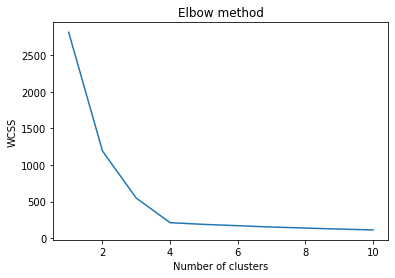

In [3]:
'''
  Determining the number of clusters required using elbow method
  wcss            - sum of squares of distance from each point to the centroid(Wthin Cluster Sum of Squares)
  n_clusters      - number of clusters
  init=k-means++  - choose the initial centers of the clusters as the centroids to make the convergence more faster
  init=random     - choose random points as the centroids
  max_iter        - Maximum number of iterations that need to be performed in a single run
  n_init          - number of times the k means algorithm will run on different centroids
'''

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # inertia is the same as wcss
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


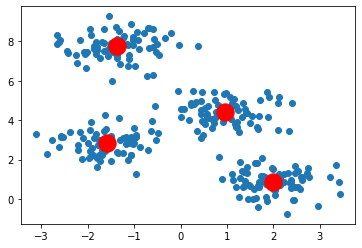

In [9]:
'''
We select the number of clusters as 4 because the grpaph begins to level off after 4
'''
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
# kmeans = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, random_state=0)
pred_y = kmeans.fit_predict(X) # Compute cluster centers and predict cluster index for each sample.
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()